In [1]:
# MINST 데이터 셋 불러오기 (없을 시 자동으로 다운로드)
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

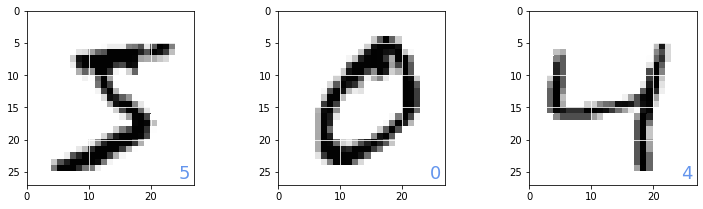

In [5]:
#-- 리스트 8-1-(2)
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure(1, figsize=(12, 3.2)) 
plt.subplots_adjust(wspace=0.5) 
plt.gray()

for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id],
             color='cornflowerblue', fontsize=18) 
    plt.xlim(0, 27)
    plt.ylim(27, 0)

    plt.grid('on', color='white') 
plt.show()

In [6]:
#-- 리스트 8-1-(3)
from tensorflow.keras.utils import to_categorical

# 훈련(학습) 데이터 준비
x_train = x_train.reshape(60000, 784) # (A) 60000 * 28 * 28 인 mnist 훈련 데이터 셋을 60000 * 756 으로 변환
x_train = x_train.astype('float32') # (B) 입력 데이터를 실수로 처리하기 위해 int 를 float 형으로 변환
x_train = x_train / 255 # (C) 픽셀 값을 0~1 까지의 값으로 변환
num_classes = 10 # 10개의 부류 (0 ~ 9)
y_train = to_categorical(y_train, num_classes) # (D) 케라스 함수를 사용하여 1-of-K 의 부호화법으로 변형

# 테스트 데이터 준비
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = to_categorical(y_test, num_classes)

In [7]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
# 리스트 8-1-(4)
# 필기체 숫자 인식을 위한 2층 피드포워드 네트워크
# 중간층 뉴런 16개, 활성함수는 시그모이드 함수

np.random.seed(1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim = 784, activation = 'sigmoid')) # (B) 중간층은 784차원 입력을 갖는 16개의 뉴런
model.add(Dense(10, activation='softmax')) # (C) 출력층은 10개의 뉴런
model.compile(loss='categorical_crossentropy',
optimizer= Adam(), metrics=['accuracy']) # (D) optimizer = Adam() 을 통해 Adam으로 설정,
# Adam(adaptive moment estimation) 은 2015년에 발표한 경사 하강법 알고리즘중 하나

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 리스트 8-1-(5)
# 학습
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size= 1000, verbose=1, validation_data=(x_test, y_test))
# (A) verbose = 1로 설정하여 매 시기의 학습 평가치가 표시
# 계산시간(computation time)

print("Computation time: {0: .3f}".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 1.9636 - accuracy: 0.4763 - val_loss: 1.6480 - val_accuracy: 0.6560
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 1.4845 - accuracy: 0.6991 - val_loss: 1.3191 - val_accuracy: 0.7669
Epoch 3/10
60/60 [==============================] - 0s 7ms/step - loss: 1.2158 - accuracy: 0.7852 - val_loss: 1.0980 - val_accuracy: 0.8197
Epoch 4/10
60/60 [==============================] - 0s 7ms/step - loss: 1.0254 - accuracy: 0.8297 - val_loss: 0.9346 - val_accuracy: 0.8510
Epoch 5/10
60/60 [==============================] - 0s 7ms/step - loss: 0.8818 - accuracy: 0.8558 - val_loss: 0.8099 - val_accuracy: 0.8678
Epoch 6/10
60/60 [==============================] - 0s 7ms/step - loss: 0.7709 - accuracy: 0.8702 - val_loss: 0.7138 - val_accuracy: 0.8765
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.6848 - accuracy: 0.8780 - val_loss: 0.6385 - val_accuracy: 0.8832
Epoch 8/10
60/60 [=

In [11]:
# 평가
# 최종적으로 테스트 데이터의 상호 엔트로피 오차(Test loss), 정답률(Test accuracy) 평가

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.49552348256111145
Test accuracy:  0.8959000110626221


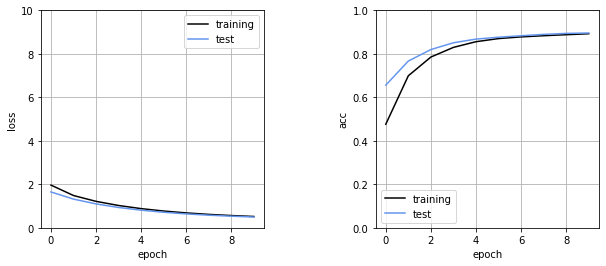

In [12]:
# 리스트 8-1-(6)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize = (10, 4))
plt.subplots_adjust(wspace = 0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'training', color = 'black')
plt.plot(history.history['val_loss'], label = 'test', color ='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label = 'training', color = 'black')
plt.plot(history.history['val_accuracy'], label = 'test', color = 'cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

313/313 [==============================] - 1s 2ms/step
Total wrong answer:  10 / 96


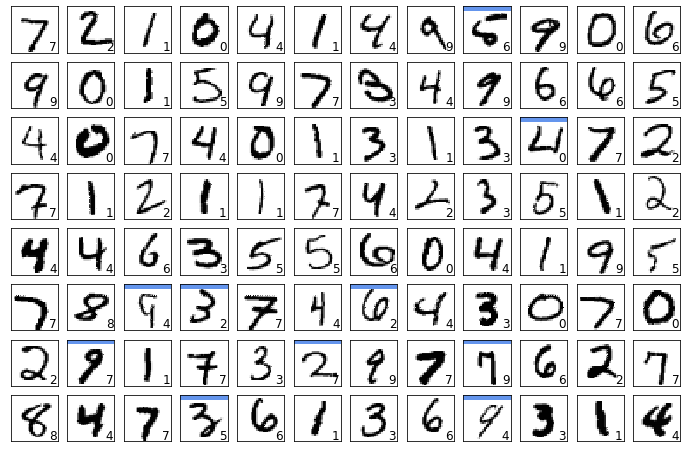

In [13]:
# 리스트 8-1-(7)
# 실제 테스트 데이터를 입력했을 대 모델의 출력
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A) x_test 전체에 대한 모델의 출력 y 를 얻을 수 있다.
    plt.figure(2, figsize = (12, 8))
    plt.gray()
    wrong_answer = 0
    # 그중 처음 96개 분량을 이미지로 출력, 파란색 가로줄은 오인식일 경우를 나타낸다.
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :] # i 번째 출력 레이블을 가져온다 
        prediction = np.argmax(wk)  # wk 에서 값이 가장 큰 요소의 인덱스 값을 가져온다 = 정답 레이블의 번호 0 ~ 9 중 하나
        plt.text(22, 25.5, "%d" % prediction, fontsize = 12)
        
        if prediction != np.argmax(y_test[i, :]): # 예측 결과(prediction) 과 y_test가 일치하지 않은 경우 상단에 파란색 줄을 긋는다.
            plt.plot([0, 27], [1, 1], color ='cornflowerblue', linewidth = 5)
            wrong_answer = wrong_answer + 1
            
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
    print("Total wrong answer: {0: d} / 96" .format(wrong_answer))
        
# 메인
show_prediction()
plt.show()

In [14]:
# 리스트 8-1-(8)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

np.random.seed(1)

model = Sequential()
model.add(Dense(16, input_dim = 784, activation = 'relu')) # (A) 활성함수를 relu로 바꾸었다
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer= Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size= 1000, verbose=1, validation_data=(x_test, y_test))
# (A) verbose = 1로 설정하여 매 시기의 학습 평가치가 표시
# 계산시간(computation time)

print("Computation time: {0: .3f}".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 8ms/step - loss: 1.5211 - accuracy: 0.5677 - val_loss: 0.8644 - val_accuracy: 0.8058
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 0.6628 - accuracy: 0.8371 - val_loss: 0.5023 - val_accuracy: 0.8731
Epoch 3/10
60/60 [==============================] - 0s 7ms/step - loss: 0.4602 - accuracy: 0.8780 - val_loss: 0.3941 - val_accuracy: 0.8942
Epoch 4/10
60/60 [==============================] - 0s 7ms/step - loss: 0.3816 - accuracy: 0.8956 - val_loss: 0.3455 - val_accuracy: 0.9062
Epoch 5/10
60/60 [==============================] - 0s 8ms/step - loss: 0.3400 - accuracy: 0.9052 - val_loss: 0.3136 - val_accuracy: 0.9130
Epoch 6/10
60/60 [==============================] - 0s 7ms/step - loss: 0.3137 - accuracy: 0.9119 - val_loss: 0.2951 - val_accuracy: 0.9155
Epoch 7/10
60/60 [==============================] - 0s 8ms/step - loss: 0.2949 - accuracy: 0.9170 - val_loss: 0.2801 - val_accuracy: 0.9192
Epoch 8/10
60/60 [==

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.2531038820743561
Test accuracy:  0.9266999959945679


313/313 [==============================] - 1s 2ms/step
Total wrong answer:  8 / 96


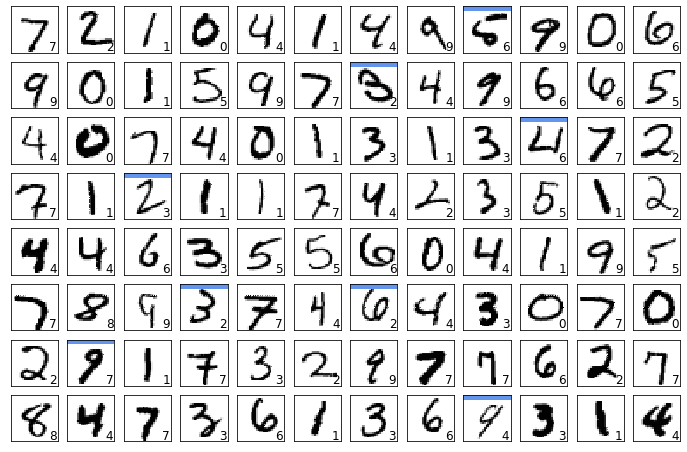

In [17]:
show_prediction()
plt.show()

In [18]:
%reset

In [19]:
# 리스트 8-2-(1)
# 데이터 준비
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [20]:
# 리스트 8-2-(3)
# 2층 합성곱 신경망을 케라스로 구현
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import time

np.random.seed(1)

model = Sequential()
model.add(Conv2D(8, (3,3), padding ='same',
input_shape = (28, 28, 1), activation = 'relu'))
# (A) Conv2D(8, (3,3)): 3 * 3 필터 8개를 사용한다
# padding = 'same': 출력 크기가 변하지 않도록 패딩을 추가해 처리한다.
# input_shape = (28, 28, 1): 입력 이미지의 크기와 채널 수
# 기본적으로 바이어스 입력이 포함되어 있으며, 각 필터에는 1변수씩 할당되며,
# 필터의 학습전 초기값은 임의로 설정, 바이어스 초기 값은 0으로 설정
model.add(Flatten())
# (B) 케라스의 합성곱층의 출력은 1+3 (배치수+특징맵 shape) 차원 배열
# (배치수, 필터수 x, 출력 이미지의 세로폭, 출력 이미지의 가로폭)
# 으로 되어 있어 이것을 다음 출력층(Dense, 전결합층) 에 넣으려면 1+1 (배치수 + 1차원 벡터) 배열로 변환
# (배치수, 필터수 x 출력이미지 세로폭 x 출력이미지 가로폭) 의 2차원 배열로 변형
# 전결합층에 넣기 전에 수행한다.
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                62730     
                                                                 
Total params: 62,810
Trainable params: 62,810
Non-trainable params: 0
_________________________________________________________________


In [22]:
startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size= 1000, verbose=1, validation_data=(x_test, y_test))
# (A) verbose = 1로 설정하여 매 시기의 학습 평가치가 표시
# 계산시간(computation time)

print("Computation time: {0: .3f}".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 5s 73ms/step - loss: 1.0103 - accuracy: 0.7812 - val_loss: 0.3814 - val_accuracy: 0.8972
Epoch 2/10
60/60 [==============================] - 5s 76ms/step - loss: 0.3297 - accuracy: 0.9053 - val_loss: 0.2769 - val_accuracy: 0.9208
Epoch 3/10
60/60 [==============================] - 5s 92ms/step - loss: 0.2583 - accuracy: 0.9269 - val_loss: 0.2311 - val_accuracy: 0.9342
Epoch 4/10
60/60 [==============================] - 5s 91ms/step - loss: 0.2143 - accuracy: 0.9402 - val_loss: 0.1911 - val_accuracy: 0.9480
Epoch 5/10
60/60 [==============================] - 5s 90ms/step - loss: 0.1792 - accuracy: 0.9501 - val_loss: 0.1655 - val_accuracy: 0.9558
Epoch 6/10
60/60 [==============================] - 6s 94ms/step - loss: 0.1526 - accuracy: 0.9577 - val_loss: 0.1412 - val_accuracy: 0.9626
Epoch 7/10
60/60 [==============================] - 6s 104ms/step - loss: 0.1308 - accuracy: 0.9642 - val_loss: 0.1233 - val_accuracy: 0.9678
Epoch 8/10
6

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.0923418328166008
Test accuracy:  0.9747999906539917


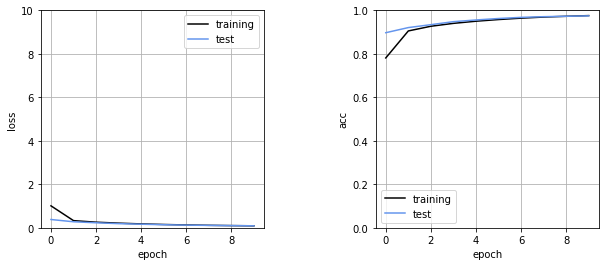

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize = (10, 4))
plt.subplots_adjust(wspace = 0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'training', color = 'black')
plt.plot(history.history['val_loss'], label = 'test', color ='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label = 'training', color = 'black')
plt.plot(history.history['val_accuracy'], label = 'test', color = 'cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

313/313 [==============================] - 1s 3ms/step
Total wrong answer:  1 / 96


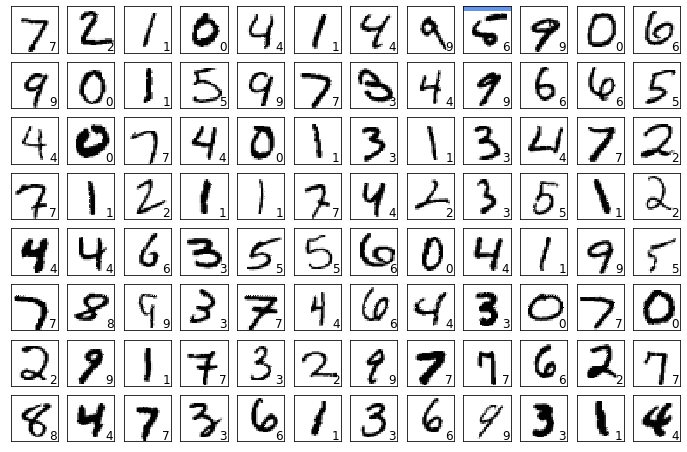

In [25]:
# 실제 테스트 데이터를 입력했을 ㄸㅐ 모델의 출력
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A) x_test 전체에 대한 모델의 출력 y 를 얻을 수 있다.
    plt.figure(2, figsize = (12, 8))
    plt.gray()
    wrong_answer = 0
    # 그중 처음 96개 분량을 이미지로 출력, 파란색 가로줄은 오인식일 경우를 나타낸다.
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :] # i 번째 출력 레이블을 가져온다 
        prediction = np.argmax(wk)  # wk 에서 값이 가장 큰 요소의 인덱스 값을 가져온다 = 정답 레이블의 번호 0 ~ 9 중 하나
        plt.text(22, 25.5, "%d" % prediction, fontsize = 12)
        
        if prediction != np.argmax(y_test[i, :]): # 예측 결과(prediction) 과 y_test가 일치하지 않은 경우 상단에 파란색 줄을 긋는다.
            plt.plot([0, 27], [1, 1], color ='cornflowerblue', linewidth = 5)
            wrong_answer = wrong_answer + 1
            
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
    print("Total wrong answer: {0: d} / 96" .format(wrong_answer))
        
# 메인
show_prediction()
plt.show()

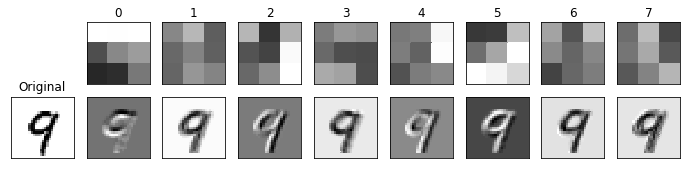

In [26]:
# 리스트 8-2-(5)
# 필터 리스트
plt.figure(1, figsize = (12, 2.5))
plt.gray()
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, : , : , 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

# layers[0] 번째 레이어의 매개변수를 갖고오는 메서드
# get_weights()[0] 은 가중치 매개변수(conv 에서는 커널의 weight)
# get_weights()[1] 은 바이어스의 매개변수를 갖고온다
w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)

for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i] # 0 ~ 7(총 여덟개) 의 필터를 순차적으로 가져온다. w.shape : (3, 3, 1, 8)
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin = min_w, vmax = max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" %i)
    
    # 필터 처리
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih : ih + 3, iw: iw +3]
            out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
    
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")

plt.show()
# 9의 이미지에 각각의 필터를 적용한 이미지
# 작은 값은 흰색, 큰 값은 검은색 으로 나타남
# 2번 필터는 가로줄 아래쪽 엣지를 강조
# 7번 필터는 가로 윗쪽 엣지를 강조

In [28]:
# 리스트 8-2-(3)
# 2층 합성곱 신경망을 케라스로 구현
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import time

np.random.seed(1)

model = Sequential()
model.add(Conv2D(16, (3, 3), padding ='same',input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) # (A) 최대 풀링층 2 * 2
model.add(Conv2D(64, (3, 3), padding ='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) # (B) 최대 풀링층 2 * 2
model.add(Dropout(0.25)) # (C) Dropout 수행으로 0.25는 남는 뉴런의 비율을 의미
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25)) # (D) Dropout 수행
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)         

In [31]:
startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size= 1000, verbose=1, validation_data=(x_test, y_test))
print("Computation time: {0: .3f}".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 58s 965ms/step - loss: 0.6818 - accuracy: 0.7941 - val_loss: 0.1336 - val_accuracy: 0.9578
Epoch 2/10
60/60 [==============================] - 63s 1s/step - loss: 0.1308 - accuracy: 0.9611 - val_loss: 0.0590 - val_accuracy: 0.9810
Epoch 3/10
60/60 [==============================] - 58s 962ms/step - loss: 0.0837 - accuracy: 0.9754 - val_loss: 0.0432 - val_accuracy: 0.9865
Epoch 4/10
60/60 [==============================] - 59s 984ms/step - loss: 0.0652 - accuracy: 0.9802 - val_loss: 0.0364 - val_accuracy: 0.9885
Epoch 5/10
60/60 [==============================] - 55s 923ms/step - loss: 0.0536 - accuracy: 0.9831 - val_loss: 0.0307 - val_accuracy: 0.9898
Epoch 6/10
60/60 [==============================] - 55s 912ms/step - loss: 0.0466 - accuracy: 0.9854 - val_loss: 0.0293 - val_accuracy: 0.9908
Epoch 7/10
60/60 [==============================] - 57s 954ms/step - loss: 0.0399 - accuracy: 0.9878 - val_loss: 0.0292 - val_accuracy: 0.9902
Ep

In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.02459961362183094
Test accuracy:  0.9922000169754028


313/313 [==============================] - 2s 7ms/step
Total wrong answer:  0 / 96


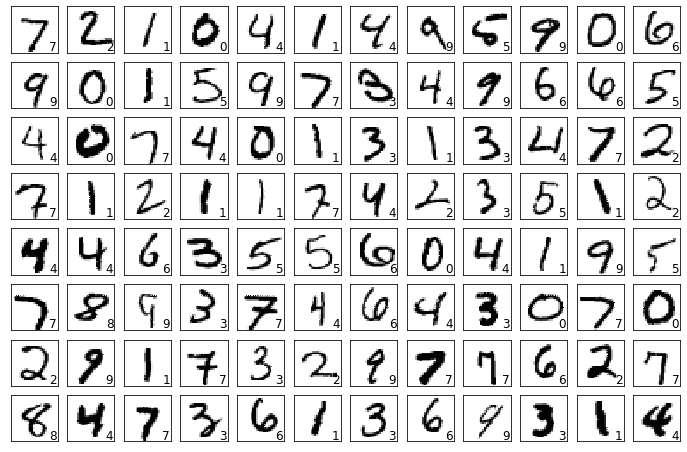

In [33]:
show_prediction()
plt.show()